# Student Performance

In [4]:
import zipfile
import os
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
# Correct file paths
extracted_folder = 'Student_Performance/'  # Path where files were extracted
student_folder = os.path.join(extracted_folder, 'student')

# Full paths to the CSV files
student_mat_path = os.path.join(student_folder, 'student-mat.csv')
student_por_path = os.path.join(student_folder, 'student-por.csv')

# Load the CSV files into DataFrames
student_mat_df = pd.read_csv(student_mat_path, sep=';')
student_por_df = pd.read_csv(student_por_path, sep=';')

# Display the first few rows of each dataset to confirm successful loading
print("\nFirst few rows of student-mat.csv:")
print(student_mat_df.head())

print("\nFirst few rows of student-por.csv:")
print(student_por_df.head())



First few rows of student-mat.csv:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

First few rows of student-por.csv:
  school sex  ag

In [12]:
# Check for missing values
print("\nMissing values in student-mat dataset:")
print(student_mat_df.isnull().sum())

print("\nMissing values in student-por dataset:")
print(student_por_df.isnull().sum())

# Summary statistics for both datasets
print("\nSummary statistics for student-mat dataset:")
print(student_mat_df.describe())
print(student_mat_df.info())

print("\nSummary statistics for student-por dataset:")
print(student_por_df.describe())
print(student_por_df.info())


Missing values in student-mat dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Missing values in student-por dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel     

In [13]:
# Inspect the data
print("First few rows of student-mat dataset:")
print(student_mat_df.head())

print("First few rows of student-por dataset:")
print(student_por_df.head())

# Check for column names and data types
print("\nColumns and data types for student-mat dataset:")
print(student_mat_df.dtypes)

print("\nColumns and data types for student-por dataset:")
print(student_por_df.dtypes)

First few rows of student-mat dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
First few rows of student-por dataset:
  school s

Missing values in student-mat dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Missing values in student-por dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel      

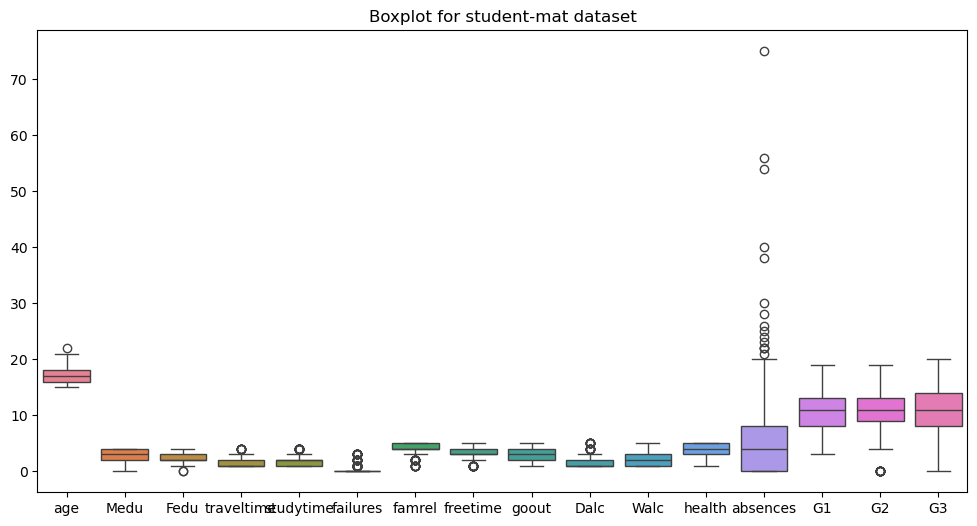

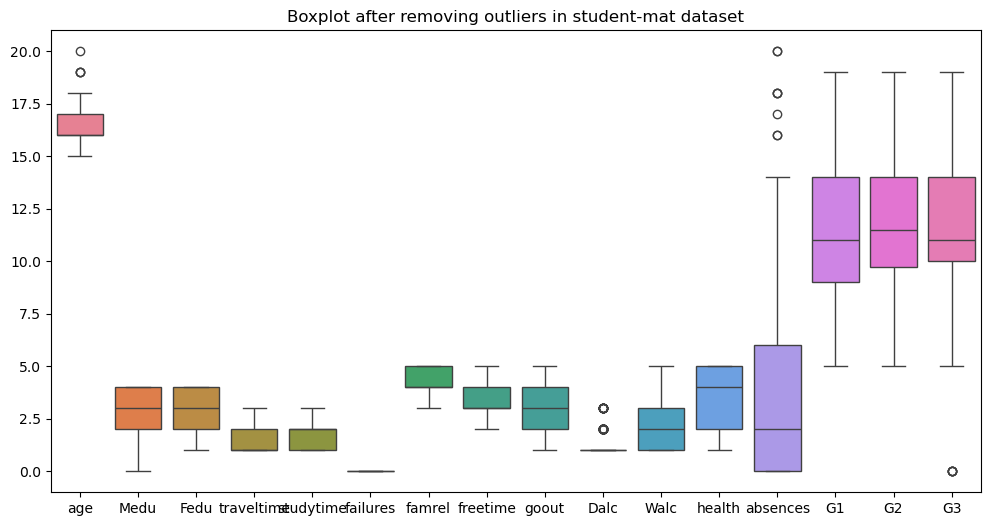

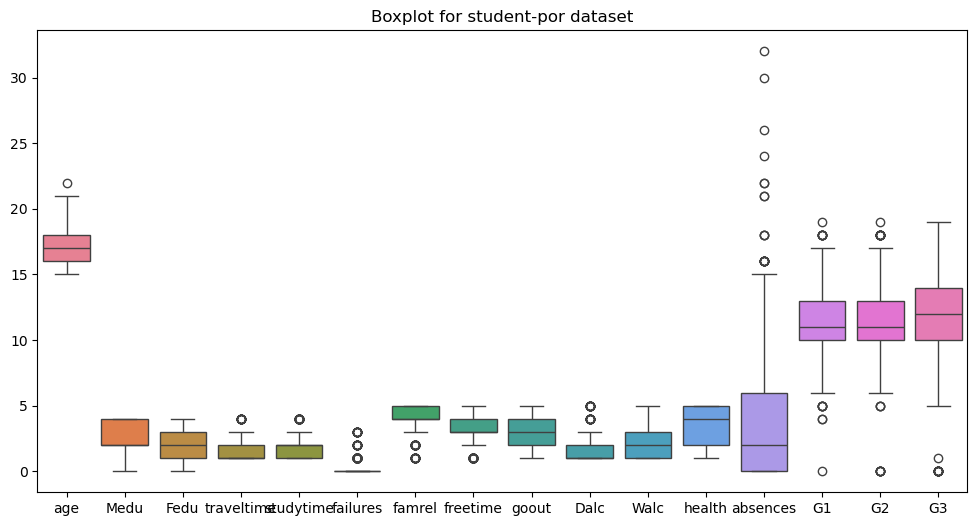

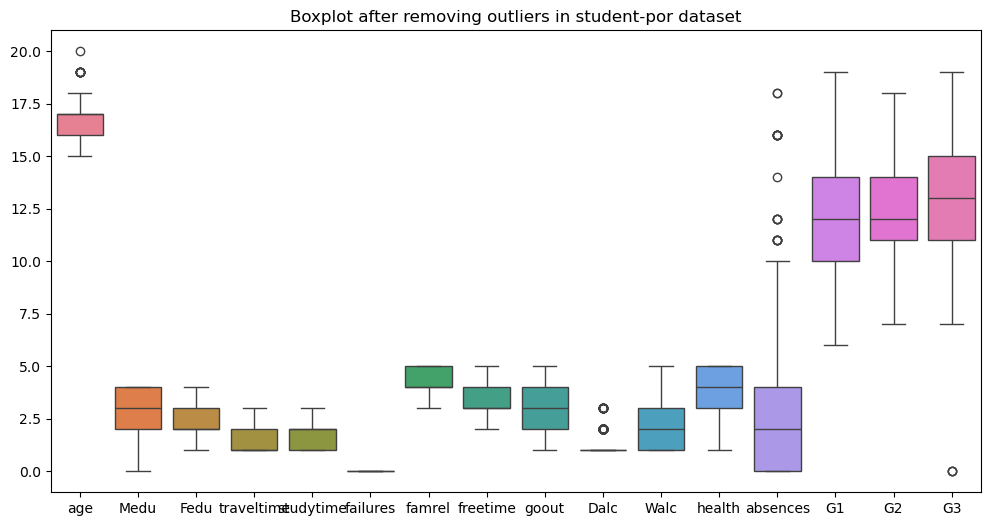

In [15]:
# Check for missing values in both datasets
print("Missing values in student-mat dataset:")
print(student_mat_df.isnull().sum())

print("\nMissing values in student-por dataset:")
print(student_por_df.isnull().sum())

# Handle missing values
# Option 1: Drop rows with missing values (if you prefer this approach)
# student_mat_df.dropna(inplace=True)
# student_por_df.dropna(inplace=True)

# Option 2: Impute missing values (if you want to keep the rows with missing values)
imputer = SimpleImputer(strategy='mean')  # You can also choose 'median' or 'most_frequent'
student_mat_df_imputed = pd.DataFrame(imputer.fit_transform(student_mat_df.select_dtypes(include=[np.number])), columns=student_mat_df.select_dtypes(include=[np.number]).columns)
student_por_df_imputed = pd.DataFrame(imputer.fit_transform(student_por_df.select_dtypes(include=[np.number])), columns=student_por_df.select_dtypes(include=[np.number]).columns)

# Impute categorical features using 'most_frequent' strategy
categorical_cols = student_mat_df.select_dtypes(include=[object]).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
student_mat_df[categorical_cols] = imputer_cat.fit_transform(student_mat_df[categorical_cols])
student_por_df[categorical_cols] = imputer_cat.fit_transform(student_por_df[categorical_cols])

# Check that there are no more missing values
print("\nMissing values after imputation in student-mat dataset:")
print(student_mat_df.isnull().sum())

print("\nMissing values after imputation in student-por dataset:")
print(student_por_df.isnull().sum())

# Visualizing outliers using boxplots for numeric columns only
numeric_columns = student_mat_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=student_mat_df[numeric_columns])  # Visualize numerical columns
plt.title("Boxplot for student-mat dataset")
plt.show()

# Remove outliers using IQR (Interquartile Range method)
Q1 = student_mat_df[numeric_columns].quantile(0.25)
Q3 = student_mat_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Apply the IQR filter to remove rows with outliers
outliers_removed = student_mat_df[~((student_mat_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (student_mat_df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check for outliers after removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=outliers_removed[numeric_columns])
plt.title("Boxplot after removing outliers in student-mat dataset")
plt.show()

# Repeat for student-por dataset if needed
# Visualizing outliers for student-por
plt.figure(figsize=(12, 6))
sns.boxplot(data=student_por_df[numeric_columns])
plt.title("Boxplot for student-por dataset")
plt.show()

# Apply the IQR filter to remove outliers for student-por
outliers_removed_por = student_por_df[~((student_por_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (student_por_df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualizing the dataset after removing outliers for student-por
plt.figure(figsize=(12, 6))
sns.boxplot(data=outliers_removed_por[numeric_columns])
plt.title("Boxplot after removing outliers in student-por dataset")
plt.show()


In [16]:
# Smooth noisy data (optional, depending on the data characteristics)
# Example of smoothing using rolling mean for 'age' column
# Since 'age' is not time-series, smoothing might not be needed. You can adjust as needed.
student_mat_df['age_rolling'] = student_mat_df['age'].rolling(window=3, min_periods=1).mean()

# Merge the datasets (if applicable)
# Assuming both datasets share common students (can merge on 'school', 'sex', or other identifiers if available)
# For example, using 'school' and 'sex' as identifiers if 'student_id' is not available
merged_df = pd.merge(student_mat_df, student_por_df, how='outer', on=['school', 'sex', 'age'])

# Check the cleaned data
print("\nCleaned student-mat dataset:")
print(student_mat_df.head())

print("\nCleaned student-por dataset:")
print(student_por_df.head())

# Checking the merged dataset
print("\nMerged dataset:")
print(merged_df.head())
print(merged_df.info())


Cleaned student-mat dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 age_rolling  
0        3     4     1     1       3        6   5   6   6   18.000000  
1        3     3     1     1       3        4   5   5   6   17.500000  
2        3     2     2     3       3       10   7   8  10   16.666667  
3        2     2     1     1       5        2  15  14  15   15.666667  
4        3     2     1     2       5        4   6  10  10   15.333333  

[5 rows x 34 columns]

Cleaned student-por dataset

In [17]:
# Data normalization (only numeric columns that should be scaled)

# Select only numeric columns for scaling
numeric_columns = student_mat_df.select_dtypes(include=[np.number]).columns

# Apply StandardScaler
scaler = StandardScaler()
student_mat_df_scaled = pd.DataFrame(scaler.fit_transform(student_mat_df[numeric_columns]), columns=numeric_columns)

# Merge the scaled numeric columns with the non-numeric columns (if any)
student_mat_df[numeric_columns] = student_mat_df_scaled

# Step 9: Save the cleaned data to new CSV files
student_mat_df.to_csv(extracted_folder + 'student-mat-cleaned.csv', index=False)
student_por_df.to_csv(extracted_folder + 'student-por-cleaned.csv', index=False)

print("\nCleaned data saved as 'student-mat-cleaned.csv' and 'student-por-cleaned.csv'.")



Cleaned data saved as 'student-mat-cleaned.csv' and 'student-por-cleaned.csv'.


In [ ]:
# Further analysis and modeling (optional)
# After cleaning the data, you can proceed with any analysis or model building, like prediction models.

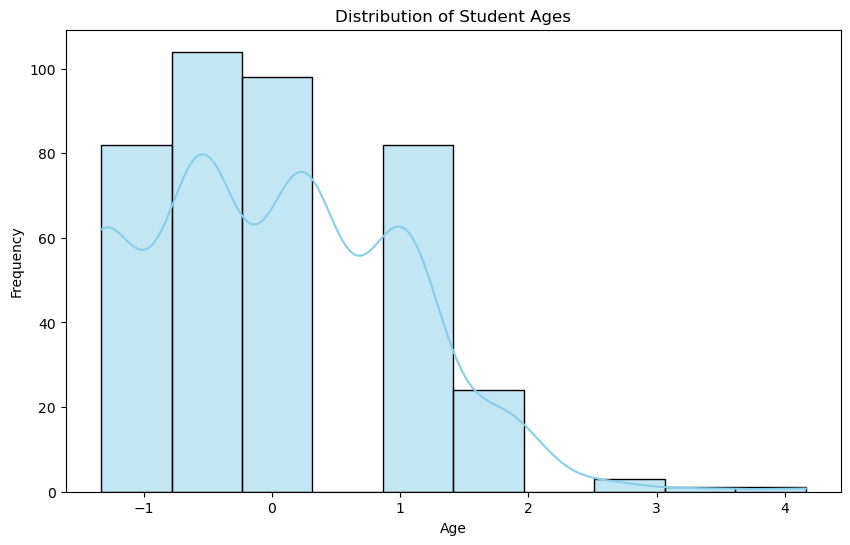

In [19]:
# Distribution of student ages
plt.figure(figsize=(10, 6))
sns.histplot(student_mat_df['age'], kde=True, color='skyblue', bins=10)
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

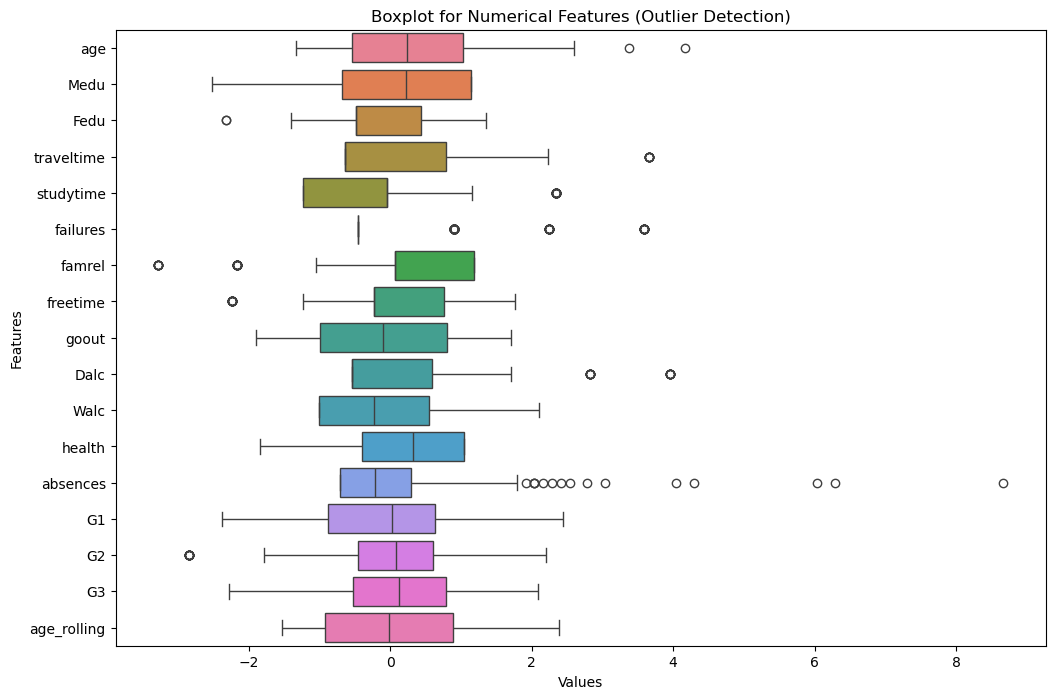

In [20]:
# Boxplot for numerical features to detect outliers
numeric_columns = student_mat_df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
sns.boxplot(data=student_mat_df[numeric_columns], orient='h')
plt.title('Boxplot for Numerical Features (Outlier Detection)')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

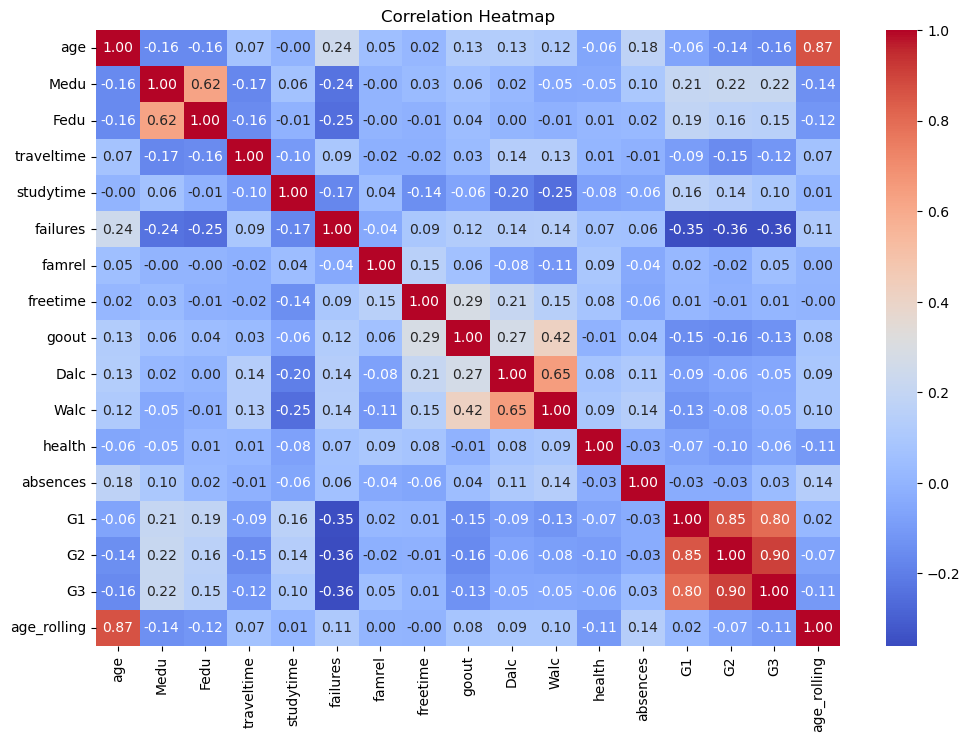

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = student_mat_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_mat_df, x=col, palette='Set2')
C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_mat_df, x=col, palette='Set2')
C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_mat_df, x=col, palette='Set2')
C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureW

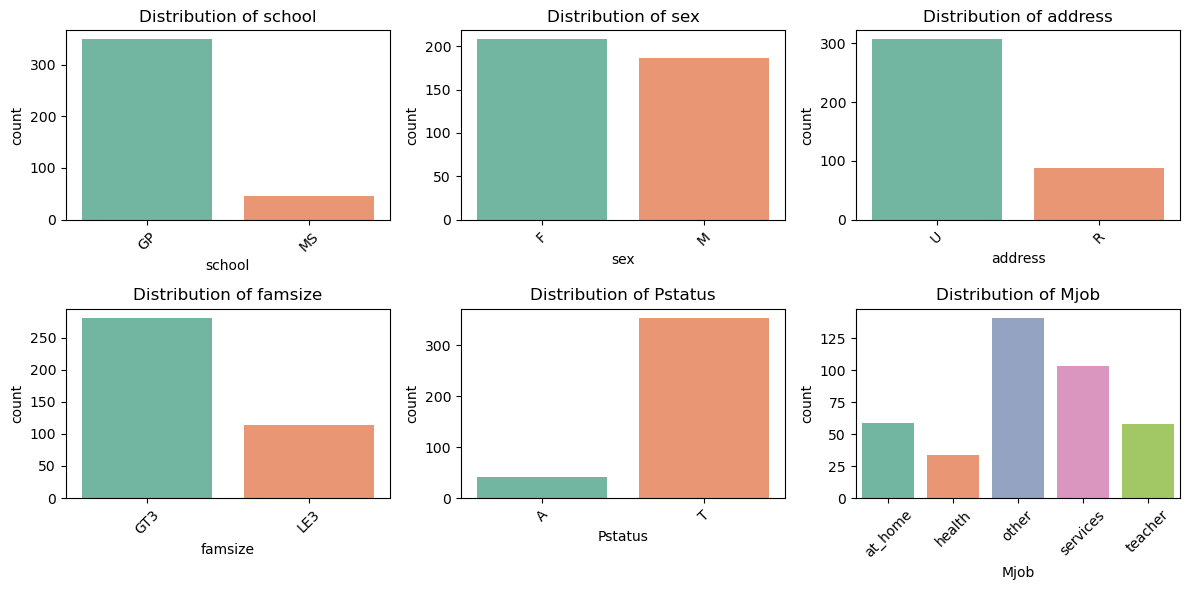

C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_mat_df, x=col, palette='Set2')
C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_mat_df, x=col, palette='Set2')
C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_mat_df, x=col, palette='Set2')
C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureW

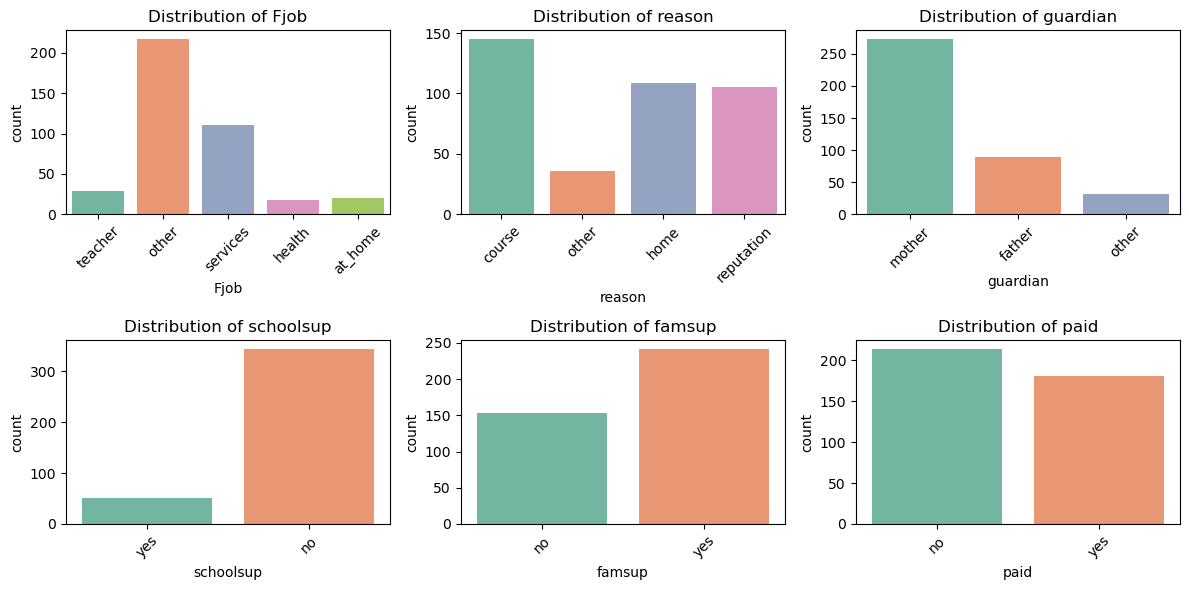

C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_mat_df, x=col, palette='Set2')
C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_mat_df, x=col, palette='Set2')
C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_mat_df, x=col, palette='Set2')
C:\Users\milto\AppData\Local\Temp\ipykernel_14768\17856734.py:13: FutureW

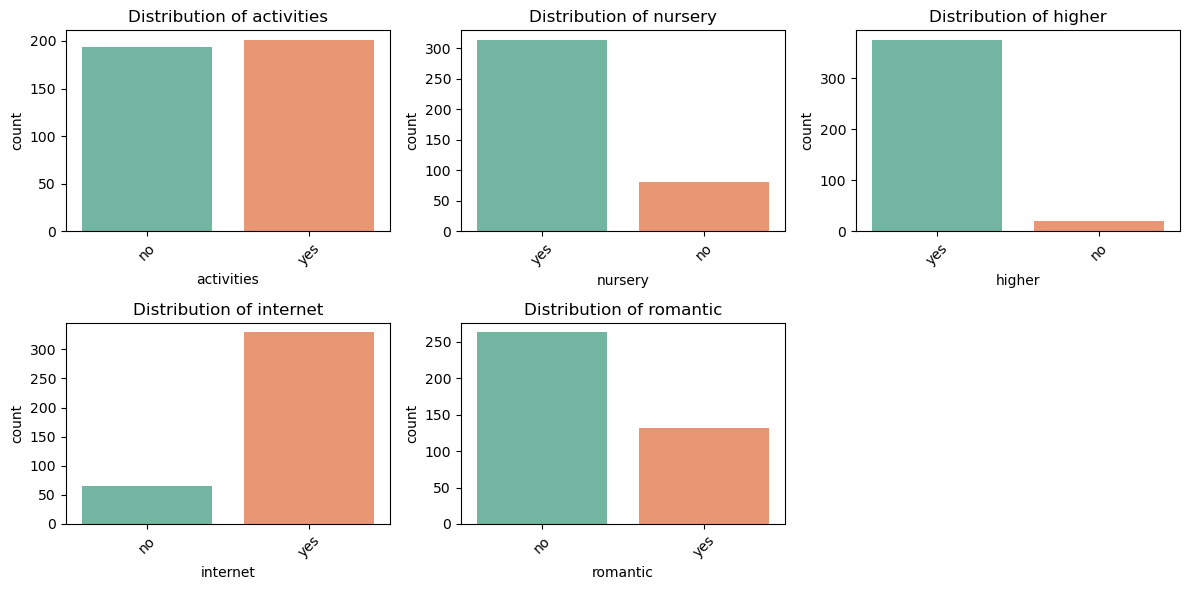

In [29]:
# Countplot for categorical features
categorical_columns = student_mat_df.select_dtypes(include=['object']).columns

# Split categorical columns into groups of 6
chunk_size = 6
chunks = [categorical_columns[i:i + chunk_size] for i in range(0, len(categorical_columns), chunk_size)]

# Plot each chunk separately
for chunk in chunks:
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(chunk, 1):
        plt.subplot(2, 3, i)  # 2 rows, 3 columns
        sns.countplot(data=student_mat_df, x=col, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

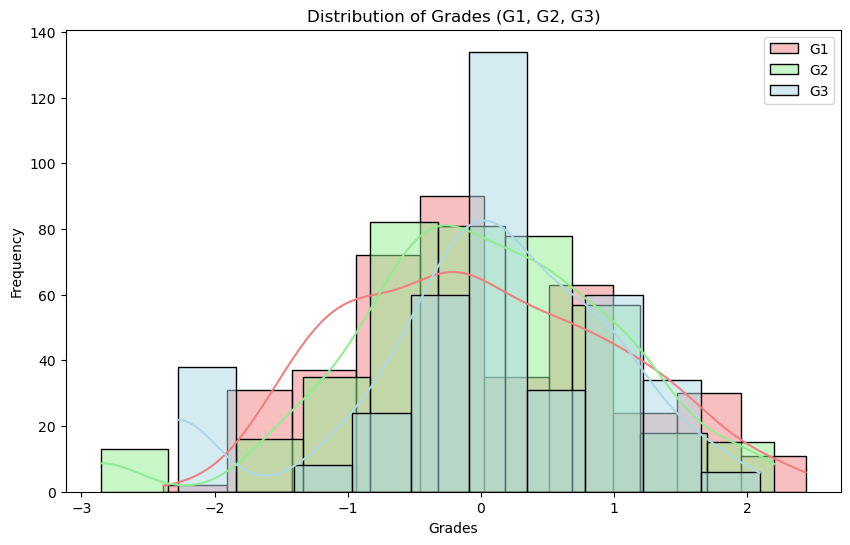

In [24]:
# Distribution of grades (G1, G2, G3)
plt.figure(figsize=(10, 6))
sns.histplot(student_mat_df['G1'], kde=True, color='lightcoral', label='G1', bins=10)
sns.histplot(student_mat_df['G2'], kde=True, color='lightgreen', label='G2', bins=10)
sns.histplot(student_mat_df['G3'], kde=True, color='lightblue', label='G3', bins=10)
plt.legend()
plt.title('Distribution of Grades (G1, G2, G3)')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()


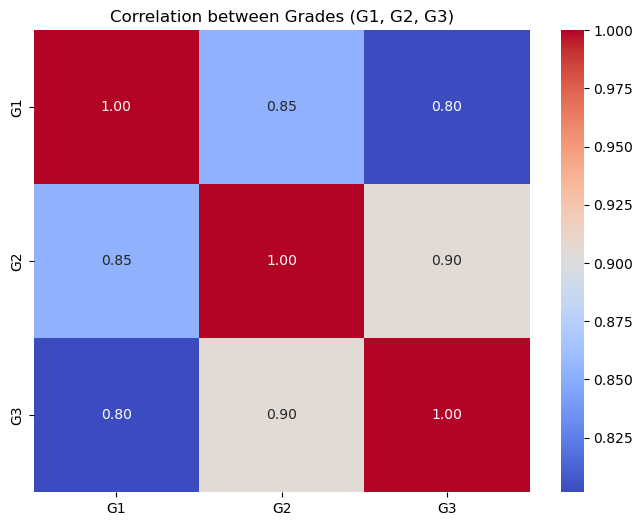

In [25]:
# Pairwise correlation between grades
plt.figure(figsize=(8, 6))
sns.heatmap(student_mat_df[['G1', 'G2', 'G3']].corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation between Grades (G1, G2, G3)')
plt.show()


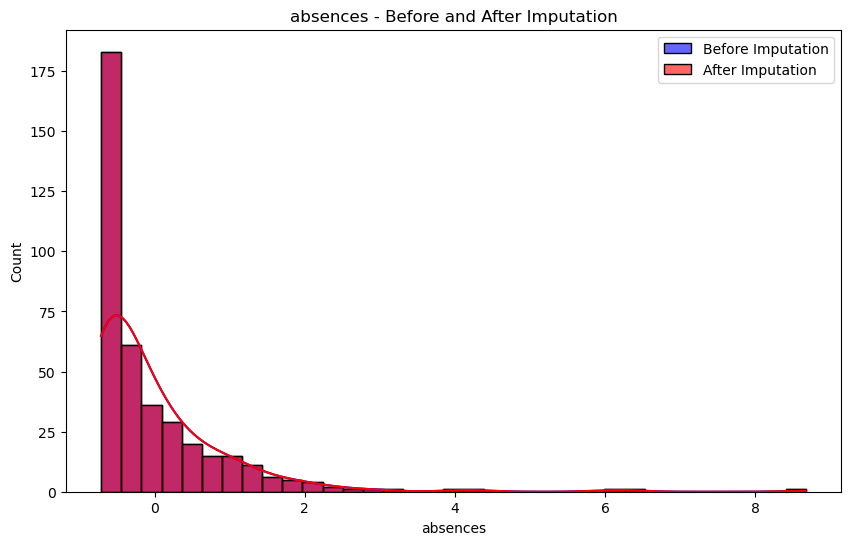

In [26]:
# Before and After Imputation Visualization

# Select a column with missing data for demonstration
column_to_impute = 'absences'

# Impute missing values using median imputation
imputer = SimpleImputer(strategy='median')
student_mat_df[column_to_impute + '_imputed'] = imputer.fit_transform(student_mat_df[[column_to_impute]])

# Visualizing before and after imputation
plt.figure(figsize=(10, 6))
sns.histplot(student_mat_df[column_to_impute], kde=True, color='blue', label='Before Imputation', alpha=0.6)
sns.histplot(student_mat_df[column_to_impute + '_imputed'], kde=True, color='red', label='After Imputation', alpha=0.6)
plt.legend()
plt.title(f'{column_to_impute} - Before and After Imputation')
plt.show()


C:\Users\milto\AppData\Local\Temp\ipykernel_14768\3258457926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=student_mat_df, palette='Set1')


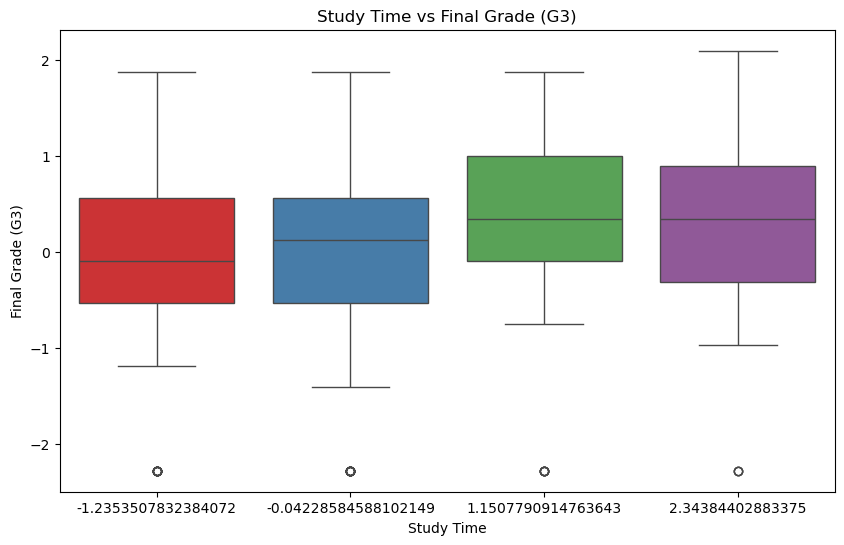

In [27]:
# Study time vs Final grade (G3)
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=student_mat_df, palette='Set1')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()
